In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload
# from tqdm.notebook import tqdm

from neuronal_tree import Tree

In [30]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from neuronal_tree import Tree

t1 = time.time()


class C():
    # the diffusion class. Owns a C.c which is the matrix with all the information
    def __init__(self, seed, N, PS=40):
        self.N = N
        self.dx = 1/N
        self.c = [[[0 for i in range(N)] for j in range(N)]]
        self.walking = True
        self.tree = Tree(seed, bounds=[[0, N], [0, N]], PS = PS)

        self.transformations = {
            0: self.up,
            1: self.down,
            2: self.left,
            3: self.right,
        }

    # check if the move doesn't go in the cluster
    def check_move(self, coord):
        return coord not in self.tree

    # assume tree is growing downwards
    def up(self, walker_p):
        # Y + 1
        new_walker_p = walker_p.copy()
        new_walker_p[1] += 1

        if new_walker_p[1] > self.N - 1:
            # respawn at Y=0 when moving past Y_max
            new_walker_p[1] = 0

        return new_walker_p

    def down(self, walker_p):
        # Y - 1
        new_walker_p = walker_p.copy()
        new_walker_p[1] -= 1

        if new_walker_p[1] < 0:
            # dont go lower than Y=0
            new_walker_p[1] = 0

        return new_walker_p

    def left(self, walker_p):
        # X - 1
        new_walker_p = walker_p.copy()
        new_walker_p[0] -= 1

        new_walker_p = self.tree.boundaries(new_walker_p)

        return new_walker_p

    def right(self, walker_p):
        # X + 1
        new_walker_p = walker_p.copy()
        new_walker_p[0] += 1

        new_walker_p = self.tree.boundaries(new_walker_p)

        return new_walker_p

    # walk untill stuck to a candidate
    def walker(self, p_stick, creation_time):

        # create list of walkers
        walker_p = []
        for w in range(1):
            rndm = random.randrange(self.N)
            walker = [rndm, 0]
            walker_p.append(walker)

        candidates = self.tree.growth_candidates()

        self.walking = True
        no_match = True
        check_stick = True

        # while not sticking
        while no_match == True:

            for w in range(len(walker_p)):

                rndm_direc = random.randrange(4)

                new_walker_p = self.transformations[rndm_direc](walker_p[w])

                if self.check_move(new_walker_p):
                    walker_p[w] = new_walker_p
                else:
                    check_stick = False

                if check_stick == True:
                    for i, j in candidates:
                        if [i, j] == walker_p[w]:
                            x = random.random()
                            if x > p_stick:
                                self.tree.add([i, j], creation_time)
                                no_match = False
                                self.walking = False
                                break

                check_stick = True


def simulation(PS):
    N = 50

    # controls the chance of the random walker sticking to the cluster
    # higher means lower chance
    p_stick = 0


    c = C(seed=[N//2, N - 1], N=N, PS=PS)

    # number of points
    for i in tqdm(range(150)):
        while (c.walking == True):
            c.walker(p_stick, i + 1)
        c.walking = True


    # 2D plotting
    c_list = [[0 for i in range(N)] for j in range(N)]

    for node in c.tree:
        i, j = node.coords
        c_list[i][j] = float(1)

#     fig, axs = plt.subplots(1, 1)
#     axs.imshow(c_list, cmap='cubehelix')
#     axs.set_title("P stick : {}".format(p_stick))
#     axs.set_xlabel("x position [-]")
#     axs.set_ylabel("y position [-]")
#     plt.show()

    #t2 = time.time()
   # print(t2-t1, "TIME")
    return(c_list)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 15.43it/s]


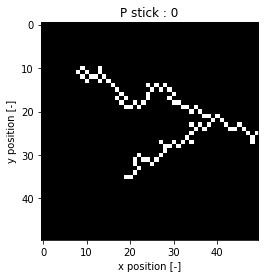

9.9353506565094 TIME


[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [22]:
simulation(20)

In [23]:
import numpy as np
import pylab as pl
def fractal_dimension(image):
    # finding all the non-zero pixels
    pixels=[]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>0:
                pixels.append((i,j))

    Lx=image.shape[1]
    Ly=image.shape[0]
    #print (Lx, Ly)
    pixels=pl.array(pixels)
   # print (pixels.shape)

    # computing the fractal dimension
    #considering only scales in a logarithmic list
    scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
    Ns=[]
    # looping over several scales
    for scale in scales:
        #print ("======= Scale :",scale)
        # computing the histogram
        H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
        Ns.append(np.sum(H>0))

    # linear fit, polynomial of degree 1
    coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
    
    return(-coeffs[0])

In [31]:
p=np.linspace(5,50,10)
fdim=[]
for i in p:
    tmp=[]
    print(i)
    for j in range (10):
        c=simulation(i)
        tmp.append(fractal_dimension(np.array(c)))
    fdim.append(np.mean(tmp))

  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

5.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

10.0


  1%|▌                                                                                 | 1/150 [00:00<00:26,  5.72it/s]

15.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

20.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

25.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

30.0


  2%|█▋                                                                                | 3/150 [00:00<00:06, 21.29it/s]

35.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

40.0


  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

45.0


  1%|█                                                                                 | 2/150 [00:00<00:11, 13.25it/s]

50.0


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:11<00:00, 12.71it/s]


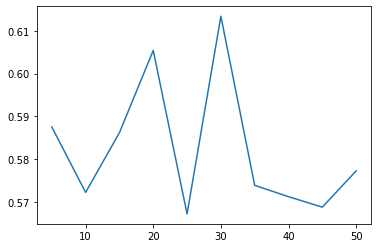

In [32]:
plt.plot(p,fdim)

In [ ]:
def length_to_width(mat):
    